In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import os

os.chdir(r'C:\Users\sriva\OneDrive\Desktop\ISM6930_Text_Analytics\Project_Files')

In [2]:
%matplotlib inline

#primevideo_data = pd.read_excel('PrimeVideoFinal.xlsx')
#netflix_data = pd.read_excel('NetflixFinal.xlsx')
#hulu_data = pd.read_excel('HuluFinal.xlsx')
#disneyplus_data = pd.read_excel('DisneyPlusFinal.xlsx')

#print(primevideo_data.shape, netflix_data.shape, hulu_data.shape, disneyplus_data.shape)

In [3]:
streaming_platforms_data = pd.read_excel('StreamFinal_455k.xlsx')
#streaming_platforms_data = pd.concat([primevideo_data, netflix_data, hulu_data, disneyplus_data], axis = 0, ignore_index = True)
print(streaming_platforms_data.shape)
streaming_platforms_data.head()

(457419, 4)


,screen_name,date_time,location,text
0,soulfulgeek,2020-04-11 23:59:57,NaN,RT @Stargirl: Be free to be you 🌟@Stargirl is ...
1,AnnaBethS4,2020-04-11 23:59:53,NaN,RT @73redpt: You can’t see one without the oth...
2,lauren_14kelly,2020-04-11 23:59:44,NaN,RT @disneyplus: Maggie Simpson stars in a bran...
3,moviefan90,2020-04-11 23:59:34,"Arkansas, USA",Dear @disneyplus: PLEASE. Revive #AgentCarter....
4,_kleonor7,2020-04-11 23:59:34,NaN,So when you gonna drop 9? https://t.co/LOsCZc4uGE


### Data Preprocessing

In [4]:
import re
from string import punctuation
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer

stop_words = stopwords.words('english')
stop_words.extend(["&amp;", "&gt;", "&lt;"])

##### Filtering out cleaned text, twitter handles and hashtags

In [5]:
tweet_tokenizer = TweetTokenizer()
tokenized_tweets = [tweet_tokenizer.tokenize(tweet) for tweet in streaming_platforms_data.text.apply(str)]
tokenized_tweets

[['RT',
  '@Stargirl',
  ':',
  'Be',
  'free',
  'to',
  'be',
  'you',
  '🌟',
  '@Stargirl',
  'is',
  'now',
  'streaming',
  'on',
  '#DisneyPlus',
  '.',
  'https://t.co/ILWFyqG2Ir'],
 ['RT',
  '@73redpt',
  ':',
  'You',
  'can',
  '’',
  't',
  'see',
  'one',
  'without',
  'the',
  'other',
  '!',
  '#elephant',
  '#DisneyPlus',
  '#inthefootstepsofelephant',
  '@disneyplus',
  '#MeghanMarkle',
  '#DuchessofSusse',
  '…'],
 ['RT',
  '@disneyplus',
  ':',
  'Maggie',
  'Simpson',
  'stars',
  'in',
  'a',
  'brand-new',
  'animated',
  'short',
  ',',
  'now',
  'streaming',
  'exclusively',
  'on',
  '#DisneyPlus',
  '.',
  'Just',
  '€',
  '6.99',
  'a',
  'month',
  'or',
  '€',
  '69.99',
  '…'],
 ['Dear',
  '@disneyplus',
  ':',
  'PLEASE',
  '.',
  'Revive',
  '#AgentCarter',
  '.',
  'This',
  'show',
  'was',
  'FANTASTIC',
  '.',
  'And',
  'with',
  'how',
  'everything',
  'ends',
  'up',
  'with',
  'Endgam',
  '…',
  'https://t.co/eRoUuMlQHD'],
 ['So', 'when', 'you

In [6]:
word_lemmatizer = WordNetLemmatizer()

# Created lists to store the cleaned text, handles and hashtags
cleaned_tweet_text = []
twitter_handles = []
twitter_hashtags = []
is_retweet = []
tweet_tokenizer = TweetTokenizer()

for tweet in tokenized_tweets:
    
    # Filtered out cleaned text, hashags, links and handles
    if re.search('^[RT\w]+', ' '.join(tweet)):
        isRetweet = True
    else:
        isRetweet = False
    words_in_tweet = [w.lower() for w in tweet if w not in stop_words and len(w) > 2]
    handles = [w for w in words_in_tweet if re.search('^@\w+', w)]
    hashtags = [w for w in words_in_tweet if re.search('^#\w+', w)]
    links = [w for w in words_in_tweet if re.search('^https:\w+', w)]
    
    words_in_tweet = [word_lemmatizer.lemmatize(w) for w in words_in_tweet if w.isalpha() and w not in handles and w not in hashtags and w not in links]
    
    #Appended the filtered objects in the respective lists
    twitter_handles.append(', '.join(handles))
    twitter_hashtags.append(', '.join(hashtags))
    cleaned_tweet_text.append(' '.join(words_in_tweet))
    is_retweet.append(isRetweet)

In [7]:
streaming_platforms_data['cleaned_tweet_text'] = pd.Series(cleaned_tweet_text)
streaming_platforms_data['twitter_handles'] = pd.Series(twitter_handles)
streaming_platforms_data['twitter_hashtags'] = pd.Series(twitter_hashtags)
streaming_platforms_data['is_retweet'] = pd.Series(is_retweet)

streaming_platforms_data.shape

(457419, 8)

In [8]:
streaming_platforms_data['cleaned_tweet_text'].head()

0                                       free streaming
1                                  you see one without
2    maggie simpson star animated short streaming e...
3    dear please revive this show fantastic and eve...
4                                           gonna drop
Name: cleaned_tweet_text, dtype: object

##### Calculated sentiments of each tweet

In [9]:
streaming_platforms_data['polarity'] = streaming_platforms_data['cleaned_tweet_text'].apply(lambda x : TextBlob(x).polarity)
streaming_platforms_data['subjectivity'] = streaming_platforms_data['cleaned_tweet_text'].apply(lambda x : TextBlob(x).subjectivity)
streaming_platforms_data['sentiment'] = ['Positive' if streaming_platforms_data.loc[i, 'polarity'] > 0.0 else 'Negative' \
                                         if streaming_platforms_data.loc[i, 'polarity'] < 0 else 'Neutral' \
                                         for i in streaming_platforms_data.index]
streaming_platforms_data.head()

,screen_name,date_time,location,text,cleaned_tweet_text,twitter_handles,twitter_hashtags,is_retweet,polarity,subjectivity,sentiment
0,soulfulgeek,2020-04-11 23:59:57,NaN,RT @Stargirl: Be free to be you 🌟@Stargirl is ...,free streaming,"@stargirl, @stargirl",#disneyplus,True,0.4,0.8,Positive
1,AnnaBethS4,2020-04-11 23:59:53,NaN,RT @73redpt: You can’t see one without the oth...,you see one without,"@73redpt, @disneyplus","#elephant, #disneyplus, #inthefootstepsofeleph...",True,0.0,0.0,Neutral
2,lauren_14kelly,2020-04-11 23:59:44,NaN,RT @disneyplus: Maggie Simpson stars in a bran...,maggie simpson star animated short streaming e...,@disneyplus,#disneyplus,True,0.0,0.3,Neutral
3,moviefan90,2020-04-11 23:59:34,"Arkansas, USA",Dear @disneyplus: PLEASE. Revive #AgentCarter....,dear please revive this show fantastic and eve...,@disneyplus,#agentcarter,True,0.4,0.9,Positive
4,_kleonor7,2020-04-11 23:59:34,NaN,So when you gonna drop 9? https://t.co/LOsCZc4uGE,gonna drop,,,True,0.0,0.0,Neutral


In [10]:
streaming_platforms_data.isna().sum()

screen_name                0
date_time                  0
location              147028
text                       2
cleaned_tweet_text         0
twitter_handles            0
twitter_hashtags           0
is_retweet                 0
polarity                   0
subjectivity               0
sentiment                  0
dtype: int64

In [11]:
streaming_platforms_data = streaming_platforms_data.dropna(subset = ['text'])
streaming_platforms_data.shape

(457417, 11)

##### Added a column for the names of the streaming platforms

In [12]:
list_of_streaming_platforms = []

# Iterated over a for loop to find out the streaming platform mentioned in the tweet
for i in streaming_platforms_data.index:
    screen_name = streaming_platforms_data.loc[i, 'screen_name']
    text = streaming_platforms_data.loc[i, 'text']
    text = text.replace('prime video', 'primevideo')
    text = text.replace('disney plus', 'disneyplus')
    tweet = text.lower()
    mentioned_platform = []
    
    if re.search(r'\b[Pp][Rr][Ii][Mm][Ee][Vv][Ii][Dd][Ee][Oo]\S*', text):
        mentioned_platform.append('primevideo')
    if re.search(r'\b[Nn][Ee][Tt][Ff][Ll][Ii][Xx]\S*', text):
        mentioned_platform.append('netflix')
    if re.search(r'\b[Hh][Uu][Ll][Uu]\S*', text):
        mentioned_platform.append('hulu')
    if re.search(r'\b[Dd][Ii][Ss][Nn][Ee][Yy][Pp][Ll][Uu][Ss]\S*', text):
        mentioned_platform.append('disneyplus')

    list_of_streaming_platforms.append(', '.join(mentioned_platform))
    
streaming_platforms_data['streaming_platform'] = pd.Series(list_of_streaming_platforms)
streaming_platforms_data = streaming_platforms_data[streaming_platforms_data['streaming_platform'] != ''].reset_index()

In [13]:
streaming_platforms_data.tail()

,index,screen_name,date_time,location,text,cleaned_tweet_text,twitter_handles,twitter_hashtags,is_retweet,polarity,subjectivity,sentiment,streaming_platform
348463,457413,playtoys,2020-04-07 00:01:01,HS Teacher ;Where I wanna be!,"@cherifxdj @netflix @PrimeVideo Pretty much, a...",pretty much purchase movie good purchase money,"@cherifxdj, @netflix, @primevideo",,False,0.383333,0.6,Positive,primevideo
348464,457414,YourFavStepmom,2020-04-07 00:01:00,NaN,"RT @PrimeVideo: Everyone, including Paul Rudd,...",everyone including paul rudd shocked learn tur...,@primevideo,,True,-0.700000,0.8,Negative,"primevideo, netflix, hulu"
348465,457415,ZapruDerFlix,2020-04-07 00:00:58,Hollywood,What are some of the negative stigmas surround...,what negative stigma surrounding anxiety,,"#stigma, #anxiety, #primevideo",True,-0.300000,0.4,Negative,"primevideo, netflix"
348466,457417,cherifxdj,2020-04-07 00:00:04,"Detroit, MI",@playtoys @netflix @PrimeVideo Wait what’s 12....,wait month you watch prime movie,"@playtoys, @netflix, @primevideo",,False,0.000000,0.0,Neutral,NaN
348467,457418,darkskyfilms,2020-04-07 00:00:00,"Orland Park, IL",One of the most acclaimed horror films of the ...,one acclaimed horror film decade stake land st...,"@mickle_jim, @nickdamici",,True,0.000000,0.0,Neutral,NaN


In [14]:
streaming_platforms_data[streaming_platforms_data['streaming_platform'].isna()].shape

(2, 13)

In [15]:
streaming_platforms_data.dropna(subset=['streaming_platform'])
print(streaming_platforms_data.shape)
streaming_platforms_data.tail()

(348468, 13)


,index,screen_name,date_time,location,text,cleaned_tweet_text,twitter_handles,twitter_hashtags,is_retweet,polarity,subjectivity,sentiment,streaming_platform
348463,457413,playtoys,2020-04-07 00:01:01,HS Teacher ;Where I wanna be!,"@cherifxdj @netflix @PrimeVideo Pretty much, a...",pretty much purchase movie good purchase money,"@cherifxdj, @netflix, @primevideo",,False,0.383333,0.6,Positive,primevideo
348464,457414,YourFavStepmom,2020-04-07 00:01:00,NaN,"RT @PrimeVideo: Everyone, including Paul Rudd,...",everyone including paul rudd shocked learn tur...,@primevideo,,True,-0.700000,0.8,Negative,"primevideo, netflix, hulu"
348465,457415,ZapruDerFlix,2020-04-07 00:00:58,Hollywood,What are some of the negative stigmas surround...,what negative stigma surrounding anxiety,,"#stigma, #anxiety, #primevideo",True,-0.300000,0.4,Negative,"primevideo, netflix"
348466,457417,cherifxdj,2020-04-07 00:00:04,"Detroit, MI",@playtoys @netflix @PrimeVideo Wait what’s 12....,wait month you watch prime movie,"@playtoys, @netflix, @primevideo",,False,0.000000,0.0,Neutral,NaN
348467,457418,darkskyfilms,2020-04-07 00:00:00,"Orland Park, IL",One of the most acclaimed horror films of the ...,one acclaimed horror film decade stake land st...,"@mickle_jim, @nickdamici",,True,0.000000,0.0,Neutral,NaN


In [16]:
# Calculated the count of each platform

count_platforms = streaming_platforms_data['streaming_platform'].value_counts()
count_platforms

netflix                                  115655
disneyplus                                81459
hulu                                      79008
primevideo                                38866
netflix, hulu                             19098
primevideo, netflix                        4937
primevideo, netflix, hulu                  4931
hulu, disneyplus                            986
netflix, disneyplus                         952
primevideo, hulu                            896
netflix, hulu, disneyplus                   767
primevideo, netflix, hulu, disneyplus       470
primevideo, netflix, disneyplus             285
primevideo, disneyplus                      145
primevideo, hulu, disneyplus                 11
Name: streaming_platform, dtype: int64

##### Created dataframes for each streaming platform

In [17]:
grouped_streaming_platforms_df = streaming_platforms_data.groupby('streaming_platform')
grouped_streaming_platforms_df.groups.keys()

dict_keys(['disneyplus', 'hulu', 'hulu, disneyplus', 'netflix', 'netflix, disneyplus', 'netflix, hulu', 'netflix, hulu, disneyplus', 'primevideo', 'primevideo, disneyplus', 'primevideo, hulu', 'primevideo, hulu, disneyplus', 'primevideo, netflix', 'primevideo, netflix, disneyplus', 'primevideo, netflix, hulu', 'primevideo, netflix, hulu, disneyplus'])

In [18]:
primevideo_df = grouped_streaming_platforms_df.get_group('primevideo')
netflix_df = grouped_streaming_platforms_df.get_group('netflix')
hulu_df = grouped_streaming_platforms_df.get_group('hulu')
disneyplus_df = grouped_streaming_platforms_df.get_group('disneyplus')
multiple_df = pd.DataFrame(columns = streaming_platforms_data.columns)

# Iterated over a for loop to distribute tweets having more than one platforms mentioned amoung the platforms
for group in grouped_streaming_platforms_df.groups.keys():
    platforms_df = grouped_streaming_platforms_df.get_group(group)
    if len(group.split(',')) > 1:
        if re.search('primevideo', group):
            primevideo_df = pd.concat([primevideo_df, platforms_df], axis = 0, ignore_index = True)
        if re.search('netflix', group):
            netflix_df = pd.concat([netflix_df, platforms_df], axis = 0, ignore_index = True)
        if re.search('hulu', group):
            hulu_df = pd.concat([hulu_df, platforms_df], axis = 0, ignore_index = True)
        if re.search('disneyplus', group):
            disneyplus_df = pd.concat([disneyplus_df, platforms_df], axis = 0, ignore_index = True)
        if group != 'primevideo' and group != 'netflix' and group != 'hulu' and group != 'disneyplus':
            multiple_df = pd.concat([multiple_df, platforms_df], axis = 0, ignore_index = True)

In [19]:
primevideo_df.tail()

,index,screen_name,date_time,location,text,cleaned_tweet_text,twitter_handles,twitter_hashtags,is_retweet,polarity,subjectivity,sentiment,streaming_platform
50536,450046,NunyaB127,2020-03-25 01:54:33,NaN,RT @NehoNana: You would have our undying suppo...,you would undying support,"@nehonana, @masterpiecepbs, @redplanettv, @pbs...","#savesanditon, #sanditon, #sanditonpbs",True,0.000,0.000,Neutral,"primevideo, netflix, hulu, disneyplus"
50537,450441,Hampshirelassy,2020-03-25 00:36:21,NaN,RT @SanditonSister2: ...and in case someone is...,case someone aware according sanditon show you...,@sanditonsister2,,True,0.375,0.375,Positive,"primevideo, netflix, hulu, disneyplus"
50538,450481,DonnaLocastro,2020-03-25 00:26:47,NaN,RT @ECD_is_a_fan: @tipsmom3 @rekrapyendis Work...,work smarter harder leave playing bed,"@ecd_is_a_fan, @tipsmom3, @rekrapyendis, @prim...",#sanditon,True,-0.100,0.000,Negative,"primevideo, netflix, hulu, disneyplus"
50539,452298,hectorluis1975,2020-04-07 19:26:24,venezuela,RT @lmaugustin: Just finished binge watching #...,just finished binge watching fantastic thank b...,"@lmaugustin, @primevideo, @neilhimself",#goodomens,True,0.600,0.825,Positive,"primevideo, netflix, hulu, disneyplus"
50540,454503,BeingThakurain,2020-04-07 13:24:05,India,RT @RahulReply: The way The Park and The Kim f...,the way the park the kim family take daily lif...,@rahulreply,,True,-0.250,0.500,Negative,"primevideo, netflix, hulu, disneyplus"


In [20]:
netflix_df.tail()

,index,screen_name,date_time,location,text,cleaned_tweet_text,twitter_handles,twitter_hashtags,is_retweet,polarity,subjectivity,sentiment,streaming_platform
147090,450046,NunyaB127,2020-03-25 01:54:33,NaN,RT @NehoNana: You would have our undying suppo...,you would undying support,"@nehonana, @masterpiecepbs, @redplanettv, @pbs...","#savesanditon, #sanditon, #sanditonpbs",True,0.000,0.000,Neutral,"primevideo, netflix, hulu, disneyplus"
147091,450441,Hampshirelassy,2020-03-25 00:36:21,NaN,RT @SanditonSister2: ...and in case someone is...,case someone aware according sanditon show you...,@sanditonsister2,,True,0.375,0.375,Positive,"primevideo, netflix, hulu, disneyplus"
147092,450481,DonnaLocastro,2020-03-25 00:26:47,NaN,RT @ECD_is_a_fan: @tipsmom3 @rekrapyendis Work...,work smarter harder leave playing bed,"@ecd_is_a_fan, @tipsmom3, @rekrapyendis, @prim...",#sanditon,True,-0.100,0.000,Negative,"primevideo, netflix, hulu, disneyplus"
147093,452298,hectorluis1975,2020-04-07 19:26:24,venezuela,RT @lmaugustin: Just finished binge watching #...,just finished binge watching fantastic thank b...,"@lmaugustin, @primevideo, @neilhimself",#goodomens,True,0.600,0.825,Positive,"primevideo, netflix, hulu, disneyplus"
147094,454503,BeingThakurain,2020-04-07 13:24:05,India,RT @RahulReply: The way The Park and The Kim f...,the way the park the kim family take daily lif...,@rahulreply,,True,-0.250,0.500,Negative,"primevideo, netflix, hulu, disneyplus"


In [21]:
hulu_df.tail()

,index,screen_name,date_time,location,text,cleaned_tweet_text,twitter_handles,twitter_hashtags,is_retweet,polarity,subjectivity,sentiment,streaming_platform
106162,450046,NunyaB127,2020-03-25 01:54:33,NaN,RT @NehoNana: You would have our undying suppo...,you would undying support,"@nehonana, @masterpiecepbs, @redplanettv, @pbs...","#savesanditon, #sanditon, #sanditonpbs",True,0.000,0.000,Neutral,"primevideo, netflix, hulu, disneyplus"
106163,450441,Hampshirelassy,2020-03-25 00:36:21,NaN,RT @SanditonSister2: ...and in case someone is...,case someone aware according sanditon show you...,@sanditonsister2,,True,0.375,0.375,Positive,"primevideo, netflix, hulu, disneyplus"
106164,450481,DonnaLocastro,2020-03-25 00:26:47,NaN,RT @ECD_is_a_fan: @tipsmom3 @rekrapyendis Work...,work smarter harder leave playing bed,"@ecd_is_a_fan, @tipsmom3, @rekrapyendis, @prim...",#sanditon,True,-0.100,0.000,Negative,"primevideo, netflix, hulu, disneyplus"
106165,452298,hectorluis1975,2020-04-07 19:26:24,venezuela,RT @lmaugustin: Just finished binge watching #...,just finished binge watching fantastic thank b...,"@lmaugustin, @primevideo, @neilhimself",#goodomens,True,0.600,0.825,Positive,"primevideo, netflix, hulu, disneyplus"
106166,454503,BeingThakurain,2020-04-07 13:24:05,India,RT @RahulReply: The way The Park and The Kim f...,the way the park the kim family take daily lif...,@rahulreply,,True,-0.250,0.500,Negative,"primevideo, netflix, hulu, disneyplus"


In [22]:
disneyplus_df.tail()

,index,screen_name,date_time,location,text,cleaned_tweet_text,twitter_handles,twitter_hashtags,is_retweet,polarity,subjectivity,sentiment,streaming_platform
85070,450046,NunyaB127,2020-03-25 01:54:33,NaN,RT @NehoNana: You would have our undying suppo...,you would undying support,"@nehonana, @masterpiecepbs, @redplanettv, @pbs...","#savesanditon, #sanditon, #sanditonpbs",True,0.000,0.000,Neutral,"primevideo, netflix, hulu, disneyplus"
85071,450441,Hampshirelassy,2020-03-25 00:36:21,NaN,RT @SanditonSister2: ...and in case someone is...,case someone aware according sanditon show you...,@sanditonsister2,,True,0.375,0.375,Positive,"primevideo, netflix, hulu, disneyplus"
85072,450481,DonnaLocastro,2020-03-25 00:26:47,NaN,RT @ECD_is_a_fan: @tipsmom3 @rekrapyendis Work...,work smarter harder leave playing bed,"@ecd_is_a_fan, @tipsmom3, @rekrapyendis, @prim...",#sanditon,True,-0.100,0.000,Negative,"primevideo, netflix, hulu, disneyplus"
85073,452298,hectorluis1975,2020-04-07 19:26:24,venezuela,RT @lmaugustin: Just finished binge watching #...,just finished binge watching fantastic thank b...,"@lmaugustin, @primevideo, @neilhimself",#goodomens,True,0.600,0.825,Positive,"primevideo, netflix, hulu, disneyplus"
85074,454503,BeingThakurain,2020-04-07 13:24:05,India,RT @RahulReply: The way The Park and The Kim f...,the way the park the kim family take daily lif...,@rahulreply,,True,-0.250,0.500,Negative,"primevideo, netflix, hulu, disneyplus"


In [23]:
multiple_df.shape

(33478, 13)

### Data Visualizations

##### Plotted tweet and retweet counts for each of the web streaming platform in a barplot

In [24]:
tweets_per_platform = []
retweets_per_platform = []
streaming_platforms = ['primevideo', 'netflix', 'hulu', 'disneyplus']

for platform in (primevideo_df, netflix_df, hulu_df, disneyplus_df):
    retweets_per_platform.append(len(platform[platform['is_retweet'] == True]))    
    tweets_per_platform.append(len(platform))
    
overall_platform_data = pd.DataFrame({'streaming_platform': streaming_platforms, 'tweet_count': tweets_per_platform, 'retweet_count': retweets_per_platform})
overall_platform_data

,streaming_platform,tweet_count,retweet_count
0,primevideo,50541,35142
1,netflix,147095,115361
2,hulu,106167,70449
3,disneyplus,85075,63262


In [77]:
import plotly.graph_objects as go

colors = ('#00A8E1', '#E50914', '#66AA33', '#113CCF')
fig = go.Figure(data = [go.Bar(name = 'Tweets', x = overall_platform_data['streaming_platform'], y = overall_platform_data['tweet_count'], marker_color = colors),\
                      go.Bar(name = 'Retweets', x = overall_platform_data['streaming_platform'], y = overall_platform_data['retweet_count'], marker_color = colors)], )
# Change the bar mode
fig.update_layout(barmode = 'group', title = 'Tweets and Retweets per Web Streaming Platform', showlegend = False)
fig.show()
fig.write_image('TweetCount_Barplot.jpg')

Taking a look at the above barplot, we could clearly observe that netflix was mentioned in maximum number of tweets, followed by hulu, disney plus and prime video.
A similar trend can be observed when looking at the retweet counts of each of the web streaming platforms.
Although there were tweets that mentioned more than one streaming platforms, we added those tweet counts to each of the platforms mentioned.

##### Plotted the number of times a streaming platform was mentioned each day

In [26]:
# Used a function to calculate the tweet count per day
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler

normalizer = MinMaxScaler()

def getTweetCountPerDay(platform_df):
    platform_df['date']  = platform_df['date_time'].dt.date
    tweets_per_day = platform_df.groupby('date').size().reset_index()
    tweets_per_day['polarity'] = platform_df.groupby('date')['polarity'].mean().reset_index().drop(['date'], axis = 1)
    return tweets_per_day

#fig = plt.figure(figsize = (20, 8))
primevideo_tweets_per_day = getTweetCountPerDay(primevideo_df)
primevideo_tweets_per_day.columns = ['date', 'tweet_count', 'sentiment_polarity']
primevideo_tweets_per_day['platform'] = 'primevideo'

netflix_tweets_per_day = getTweetCountPerDay(netflix_df)
netflix_tweets_per_day.columns = ['date', 'tweet_count', 'sentiment_polarity']
netflix_tweets_per_day['platform'] = 'netflix'

hulu_tweets_per_day = getTweetCountPerDay(hulu_df)
hulu_tweets_per_day.columns = ['date', 'tweet_count', 'sentiment_polarity']
hulu_tweets_per_day['platform'] = 'hulu'

disneyplus_tweets_per_day = getTweetCountPerDay(disneyplus_df)
disneyplus_tweets_per_day.columns = ['date', 'tweet_count', 'sentiment_polarity']
disneyplus_tweets_per_day['platform'] = 'disneyplus'

tweets_per_day_df = pd.concat([primevideo_tweets_per_day, netflix_tweets_per_day, hulu_tweets_per_day, disneyplus_tweets_per_day], axis = 0, ignore_index = True)
#tweets_per_day_df.to_csv('tweets_count_df.csv')
tweet_count = tweets_per_day_df['tweet_count'].values.reshape(-1, 1)
normalizer.fit(tweet_count)
tweets_per_day_df['tweet_count'] = normalizer.transform(tweet_count)

fig = px.line(tweets_per_day_df, x = 'date', y = 'tweet_count', color = 'platform', title = 'Tweet Count per day for the Web Streaming Platforms')
fig.show()
fig.write_image('TweetCountPerDay.jpg')

In [27]:
fig = px.line(tweets_per_day_df, x = 'date', y = 'sentiment_polarity', color = 'platform', title = 'Average Tweet Sentiment per day for the Web Streaming Platforms')
fig.show()
fig.write_image('AverageTweetSentimentPerDay.jpg')

##### Plotted count of 5 most frequently used words for each of the streaming platforms

In [28]:
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter

# Used a function to get 5 most frequently used words
def getFrequentlyUsedWords(text):
    words = word_tokenize(text)
    junk_words =  ['the', 'primevideo', 'netflix', 'hulu', 'disneyplus']
    words = [w for w in words if w.isalpha() and w not in junk_words]
    frequent_words = Counter(words).most_common(5)
    return frequent_words

In [29]:
# Stored the streaming platforms' names and frequently used words in a dictionary
frequent_words_dict = {}
frequent_words_dict['primevideo'] = getFrequentlyUsedWords(' '.join(primevideo_df['cleaned_tweet_text'].values))
frequent_words_dict['netflix'] = getFrequentlyUsedWords(' '.join(netflix_df['cleaned_tweet_text'].values))
frequent_words_dict['hulu'] = getFrequentlyUsedWords(' '.join(hulu_df['cleaned_tweet_text'].values))
frequent_words_dict['disneyplus'] = getFrequentlyUsedWords(' '.join(disneyplus_df['cleaned_tweet_text'].values))

frequent_words_dict

{'primevideo': [('watch', 4853),
  ('got', 4073),
  ('movie', 2678),
  ('season', 2379),
  ('streaming', 2274)],
 'netflix': [('watch', 13054),
  ('need', 12138),
  ('movie', 12007),
  ('series', 11075),
  ('still', 9884)],
 'hulu': [('watch', 13276),
  ('show', 9343),
  ('season', 6293),
  ('watching', 6113),
  ('good', 5537)],
 'disneyplus': [('streaming', 14294),
  ('chance', 9433),
  ('pop', 9147),
  ('follow', 7718),
  ('disney', 7614)]}

In [30]:
# Used a function to print 5 most frequent words
def printMostFrequentWords(platform, frequent_words):
    words, count = zip(*frequent_words)
    print('Top 5 frequent words used in tweets related to %s'%platform,'are: ')
    print(', '.join(words), '\n')

for key, value in frequent_words_dict.items():
    printMostFrequentWords(key, value)

Top 5 frequent words used in tweets related to primevideo are: 
watch, got, movie, season, streaming 

Top 5 frequent words used in tweets related to netflix are: 
watch, need, movie, series, still 

Top 5 frequent words used in tweets related to hulu are: 
watch, show, season, watching, good 

Top 5 frequent words used in tweets related to disneyplus are: 
streaming, chance, pop, follow, disney 



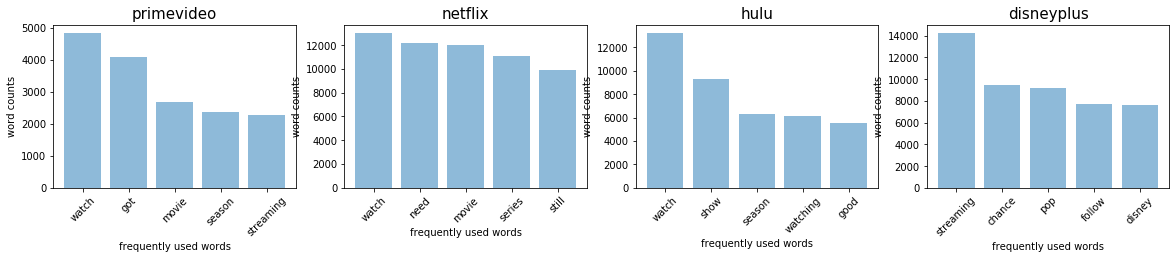

In [31]:
# Used a function to plot 5 most frequent words
def plotMostFrequentWords(platform, frequent_words):
    words, count = zip(*frequent_words)
    plt.bar(words, count, alpha = 0.5)

fig = plt.figure(figsize=(20,3))
i = 141
for key, value in frequent_words_dict.items():
    plt.subplot(i)
    plt.xticks(rotation = 45)
    plotMostFrequentWords(key, value)
    plt.xlabel('frequently used words')
    plt.ylabel('word counts')
    plt.title(key, fontsize=15)
    i = i + 1

plt.show()
fig.savefig('FrequentlyUsedWords.jpg')

##### Sentiment Analysis of tweets related to each streaming platform

In [32]:
# Used plotly to plot a grouped dataframe columns as frequency distributions
import plotly.figure_factory as ff

combined_polarity_list = []
for platform in (primevideo_df, netflix_df, hulu_df, disneyplus_df):
    platform.loc[(platform['polarity'].values >= 0.05) | (platform['polarity'].values <= -0.05), 'polarity']
    combined_polarity_list.append(platform.loc[(platform['polarity'].values >= 0.05) | (platform['polarity'].values <= -0.05), 'polarity'].values)
    
fig = ff.create_distplot(combined_polarity_list, streaming_platforms, show_hist = False, show_rug = False, colors=colors)
fig.update_layout(title = 'Sentiment Polarity of Web Streaming Platforms', xaxis_title = 'Polarity', yaxis_title = 'Tweet Count')
fig.show()
fig.write_image('SentimentPolarity.jpg')

##### Plotted overall sentiment polarity of each streaming platform to compare it against their tweet counts

In [33]:
sentiment_list = []

for platform in (primevideo_df, netflix_df, hulu_df, disneyplus_df):
    sentiment_list.append(TextBlob(' '.join(platform['cleaned_tweet_text'].values)).sentiment.polarity)

overall_platform_data['sentiment_polarity'] = pd.Series(sentiment_list)
overall_platform_data

,streaming_platform,tweet_count,retweet_count,sentiment_polarity
0,primevideo,50541,35142,0.236938
1,netflix,147095,115361,0.118447
2,hulu,106167,70449,0.170858
3,disneyplus,85075,63262,0.267824


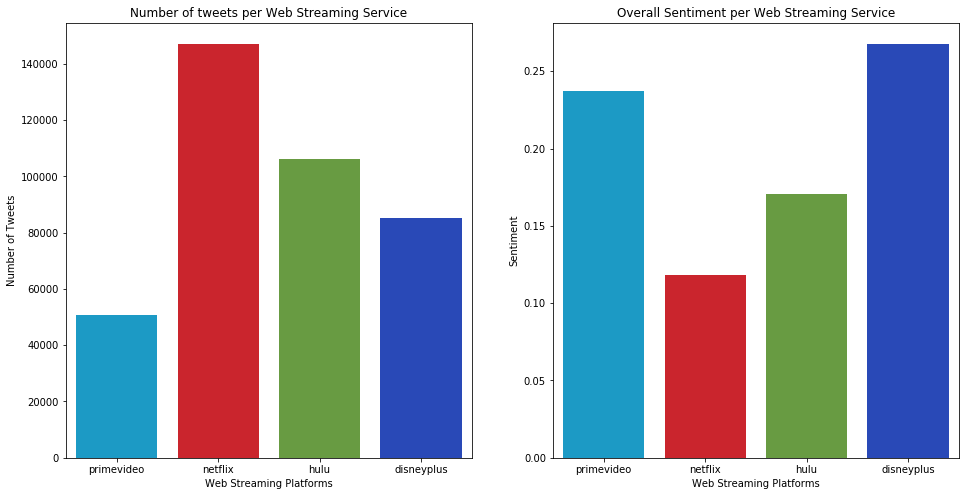

In [34]:
fig = plt.figure(figsize = (16, 8))

plt.subplot(121)
bar1 = sb.barplot(x = 'streaming_platform', y = 'tweet_count', data = overall_platform_data, palette = colors)
plt.title('Number of tweets per Web Streaming Service')
plt.xlabel('Web Streaming Platforms')
plt.ylabel('Number of Tweets')

plt.subplot(122)
bar2 = sb.barplot(x = 'streaming_platform', y = 'sentiment_polarity', data = overall_platform_data, palette = colors)
plt.title('Overall Sentiment per Web Streaming Service')
plt.xlabel('Web Streaming Platforms')
plt.ylabel('Sentiment')

fig.savefig('SentimentvsTweetCount')

Its quite interesting to observe that, Netflix, which has the highest tweet count, has the worst sentiment polarity, whereas Prime Video, which has the lowest tweet count, has the highest sentiment polarity.
Based on our observation, we could say that as the number of tweets has increased, the overall sentiment polarity has decreased.

##### Plotted positive vs negative tweets per streaming platform

In [35]:
# Created new columns in the overall_platform_data
overall_platform_data['positive_tweet_count'] = ''
overall_platform_data['positive_tweet_percentage'] = ''
overall_platform_data['negative_tweet_count'] = ''
overall_platform_data['negative_tweet_percentage'] = ''

# Iterated over a for loop to calculate the positive and negative tweet counts and percentages
for platform in (primevideo_df, netflix_df, hulu_df, disneyplus_df):
    platform_name = platform.loc[0, 'streaming_platform']
    
    negative_tweet_count = len(platform.loc[platform['sentiment'] == 'Negative'])
    negative_tweet_percentage = negative_tweet_count/overall_platform_data.loc[overall_platform_data['streaming_platform'] == platform_name, 'tweet_count']

    overall_platform_data.loc[overall_platform_data['streaming_platform'] == platform_name, 'negative_tweet_count'] = negative_tweet_count
    overall_platform_data.loc[overall_platform_data['streaming_platform'] == platform_name, 'negative_tweet_percentage'] = negative_tweet_percentage
    
    positive_tweet_count = len(platform.loc[platform['sentiment'] == 'Positive'])
    positive_tweet_percentage = positive_tweet_count/overall_platform_data.loc[overall_platform_data['streaming_platform'] == platform_name, 'tweet_count']
    
    overall_platform_data.loc[overall_platform_data['streaming_platform'] == platform_name, 'positive_tweet_count'] = positive_tweet_count
    overall_platform_data.loc[overall_platform_data['streaming_platform'] == platform_name, 'positive_tweet_percentage'] = positive_tweet_percentage
    
overall_platform_data

,streaming_platform,tweet_count,retweet_count,sentiment_polarity,positive_tweet_count,positive_tweet_percentage,negative_tweet_count,negative_tweet_percentage
0,primevideo,50541,35142,0.236938,22616,0.447478,4672,0.0924398
1,netflix,147095,115361,0.118447,47420,0.322377,21343,0.145097
2,hulu,106167,70449,0.170858,43600,0.410674,15463,0.145648
3,disneyplus,85075,63262,0.267824,40265,0.473288,5953,0.0699736


In [76]:
fig = go.Figure(data = [go.Bar(name = 'Positive', x = overall_platform_data['streaming_platform'], y = overall_platform_data['positive_tweet_percentage'], marker_color = colors),\
                      go.Bar(name = 'Negative', x = overall_platform_data['streaming_platform'], y = overall_platform_data['negative_tweet_percentage'], marker_color = colors)])
# Change the bar mode
fig.update_layout(barmode = 'group', title = '% Positive vs % Negative Tweets per Web Streaming Platform', showlegend = False)
fig.show()
fig.write_image('PosvsNeg.jpg')

### Topic Modelling

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation as LDA
from nltk.tokenize import sent_tokenize

In [38]:
vec = TfidfVectorizer(max_df = 0.90, min_df = 5, stop_words = 'english')

In [50]:
def extract_nouns_and_adjectives(list):
    list_of_pos = []
    #junk_words =  ['the', 'primevideo', 'netflix', 'hulu', 'disneyplus']
    for string in list:
        #string = ' '.join([w for w in string if w not in junk_words])
        blob = TextBlob(string)
        target_pos = ''
        for w, p in blob.tags:
            if p == 'NN' or p == 'ADJ':
                target_pos = target_pos + ' ' + w
        list_of_pos.append(target_pos)
    return list_of_pos

In [51]:
# Used a function to extract top 5 topics

def extract_topics(tfidf):
    list_of_keywords = []
    model = LDA(n_components=5).fit(tfidf)
    terms = vec.get_feature_names()
    for i, comp in enumerate(model.components_):
        terms_comp = zip(terms, comp)
        sorted_terms = sorted(terms_comp, key=lambda x:x[1], reverse=True)[:3]
        keywords = ' '.join([w[0] for w in sorted_terms])
        list_of_keywords.append(keywords)
    return list_of_keywords

In [52]:
lsa_topics = ''
lda_topics = ''
overall_platform_data['positive_topics'] = ''
overall_platform_data['negative_topics'] = ''
for platform in (primevideo_df, netflix_df, hulu_df, disneyplus_df, multiple_df):
    platform_name = platform.loc[0, 'streaming_platform']
    if len(platform_name.split()) > 1:
        platform_name = 'multiple platforms'
    positive_tweet_list = platform.loc[platform['sentiment'] == 'Positive', 'cleaned_tweet_text'].tolist()
    positive_pos_in_tweet = extract_nouns_and_adjectives(positive_tweet_list)
    positive_tweet_pos_list = '. '.join(positive_pos_in_tweet)
    pos_tfidf = vec.fit_transform(sent_tokenize(positive_tweet_pos_list))
    positive_topics = ', '.join(extract_topics(pos_tfidf))
    
    negative_tweet_list = platform.loc[platform['sentiment'] == 'Negative', 'cleaned_tweet_text'].tolist()
    negative_pos_in_tweet = extract_nouns_and_adjectives(negative_tweet_list)
    negative_tweet_pos_list = '. '.join(negative_pos_in_tweet)
    neg_tfidf = vec.fit_transform(sent_tokenize(negative_tweet_pos_list))
    negative_topics = ', '.join(extract_topics(neg_tfidf))
                                
    print('Most frequent positive topics used in tweets related to %s'%platform_name)
    print(positive_topics, '\n')
    
    print('Most frequent negative topics used in tweets related to %s'%platform_name)
    print(negative_topics, '\n')
                       
    overall_platform_data.loc[overall_platform_data['streaming_platform'] == platform_name, 'positive_topics'] = positive_topics
    overall_platform_data.loc[overall_platform_data['streaming_platform'] == platform_name, 'negative_topics'] = negative_topics
overall_platform_data    

Most frequent positive topics used in tweets related to primevideo
series episode season, look today moment, amazon film work, movie way game, watch love day 

Most frequent negative topics used in tweets related to primevideo
movie day series, time episode world, today turn paul, round masterclass gather, film game hulu 

Most frequent positive topics used in tweets related to netflix
home park lol, love netflix right, tiger netflix series, netflix watch movie, season netflix hulu 

Most frequent negative topics used in tweets related to netflix
watch series netflix, netflix complaint hate, fyi netflix hulu, house netflix minute, movie story shit 

Most frequent positive topics used in tweets related to hulu
season hulu right, watch hulu movie, hulu burger bob, netflix hulu watch, hulu lol love 

Most frequent negative topics used in tweets related to hulu
hulu shit time, season episode hulu, game hulu netflix, movie hulu fuck, watch hulu girl 

Most frequent positive topics used in t

,streaming_platform,tweet_count,retweet_count,sentiment_polarity,positive_tweet_count,positive_tweet_percentage,negative_tweet_count,negative_tweet_percentage,positive_topics,negative_topics
0,primevideo,50541,35142,0.236938,22616,0.447478,4672,0.0924398,"series episode season, look today moment, amaz...","movie day series, time episode world, today tu..."
1,netflix,147095,115361,0.118447,47420,0.322377,21343,0.145097,"home park lol, love netflix right, tiger netfl...","watch series netflix, netflix complaint hate, ..."
2,hulu,106167,70449,0.170858,43600,0.410674,15463,0.145648,"season hulu right, watch hulu movie, hulu burg...","hulu shit time, season episode hulu, game hulu..."
3,disneyplus,85075,63262,0.267824,40265,0.473288,5953,0.0699736,"chance child pop, season fan movie, disney mov...","disney watch game, episode release way, disney..."


In [53]:
streaming_platforms_data.shape

(348468, 13)

In [54]:
streaming_platforms_data.drop(['twitter_hashtags', 'twitter_handles', 'polarity', 'subjectivity', 'streaming_platform'], axis = 1).to_pickle('streaming_platforms_data.pkl')

In [56]:
primevideo_df.to_csv('primevideo_df.csv')
netflix_df.to_csv('netflix_df.csv')
hulu_df.to_csv('hulu_df.csv')
disneyplus_df.to_csv('disneyplus_df.csv')
overall_platform_data.to_csv('overall_platform_data.csv')
tweets_per_day_df.to_csv('tweet_per_day.csv')

In [73]:
disneyplus_df.dtypes

index                          int64
screen_name                   object
date_time             datetime64[ns]
location                      object
text                          object
cleaned_tweet_text            object
twitter_handles               object
twitter_hashtags              object
is_retweet                      bool
polarity                     float64
subjectivity                 float64
sentiment                     object
streaming_platform            object
date                          object
dtype: object